In [28]:
!pip install geopandas

In [0]:
import geopandas

Geometry Files:

bus: https://data.cityofchicago.org/Transportation/CTA-Bus-Stops-Shapefile/pxug-u72f

disticts: https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r

metra: https://data.cityofchicago.org/Transportation/Metra-Stations/nqm8-q2ym

In [0]:
GEO_FILE = r'PoliceDistrict.shp'
GEO_FILE2 = r'geo_export_b9a0936e-0fff-4498-be63-3d424bdbd6d2.shp'

In [0]:
points = geopandas.read_file(GEO_FILE2)

In [5]:
points.head()

dist_label dist_num                                           geometry
0       17TH       17  POLYGON ((-87.71067089391354 41.99736565536944...
1       20TH       20  POLYGON ((-87.66029423572358 41.99091633853978...
2       31ST       31  POLYGON ((-87.82817787271652 41.98384222028714...
3       31ST       31  POLYGON ((-87.83365455160555 41.97535481526603...
4       19TH       19  POLYGON ((-87.64491798568677 41.96972709381483...

In [0]:
#points['geometry'] = points['geometry'].to_crs(epsg=4326)

In [0]:
def getXYCoords(geometry, coord_type):
    """ Returns either x or y coordinates from  geometry coordinate sequence. Used with LineString and Polygon geometries."""
    if coord_type == 'x':
        return geometry.coords.xy[0]
    elif coord_type == 'y':
        return geometry.coords.xy[1]

def getPolyCoords(geometry, coord_type):
    """ Returns Coordinates of Polygon using the Exterior of the Polygon."""
    ext = geometry.exterior
    return getXYCoords(ext, coord_type)

def getLineCoords(geometry, coord_type):
    """ Returns Coordinates of Linestring object."""
    return getXYCoords(geometry, coord_type)

def getPointCoords(geometry, coord_type):
    """ Returns Coordinates of Point object."""
    if coord_type == 'x':
        return geometry.x
    elif coord_type == 'y':
        return geometry.y


In [0]:
def getCoords(row, geom_col, coord_type):
    """
    Returns coordinates ('x' or 'y') of a geometry (Point, LineString or Polygon) as a list (if geometry is LineString or Polygon).
    Can handle also MultiGeometries.
    """
    # Get geometry
    geom = row[geom_col]

    # Check the geometry type
    gtype = geom.geom_type

    # "Normal" geometries
    # -------------------

    if gtype == "Point":
        return getPointCoords(geom, coord_type)
    elif gtype == "LineString":
        return list( getLineCoords(geom, coord_type) )
    elif gtype == "Polygon":
        return list( getPolyCoords(geom, coord_type) )

    # Multi geometries
    # ----------------

    else:
        return list( multiGeomHandler(geom, coord_type, gtype) )

In [8]:
points.loc[points.dist_num == '1', :]

dist_label dist_num                                           geometry
21        1ST        1  POLYGON ((-87.62437192003144 41.88885731075258...

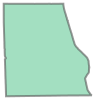

In [9]:
points.geometry[0]

In [0]:
points['x'] = points.apply(getCoords, geom_col="geometry", coord_type="x", axis=1)

In [0]:
points['y'] = points.apply(getCoords, geom_col="geometry", coord_type="y", axis=1)

In [0]:
points['Center'] = points['geometry'].centroid

In [0]:
points['Xmid'] = points.apply(getCoords, geom_col="Center", coord_type="x", axis=1)
points['Ymid'] = points.apply(getCoords, geom_col="Center", coord_type="y", axis=1)

In [15]:
points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
dist_label    25 non-null object
dist_num      25 non-null object
geometry      25 non-null object
x             25 non-null object
y             25 non-null object
Center        25 non-null object
Xmid          25 non-null float64
Ymid          25 non-null float64
dtypes: float64(2), object(6)
memory usage: 1.6+ KB


In [16]:
type(points.x[0])

list

In [0]:
export_points = points.drop(['geometry', 'Center'], axis=1).copy()

In [18]:
type(export_points)

geopandas.geodataframe.GeoDataFrame

In [0]:
import pandas as pd

In [0]:
test = pd.DataFrame(export_points)

In [21]:
type(test)

pandas.core.frame.DataFrame

In [22]:
test.head(2)

dist_label dist_num                                                  x  \
0       17TH       17  [-87.71067089391354, -87.71066884721016, -87.7...   
1       20TH       20  [-87.66029423572358, -87.66029047841705, -87.6...   

                                                   y       Xmid       Ymid  
0  [41.997365655369435, 41.99729359357709, 41.997... -87.724143  41.966390  
1  [41.990916338539776, 41.99079098951434, 41.990... -87.677595  41.979602

In [0]:
import pickle

In [0]:
test['DIST_NUM'] = test.dist_num.astype(int)

In [0]:
del test['dist_num']

In [30]:
test.head(2)

dist_label                                                  x  \
0       17TH  [-87.71067089391354, -87.71066884721016, -87.7...   
1       20TH  [-87.66029423572358, -87.66029047841705, -87.6...   

                                                   y       Xmid       Ymid  \
0  [41.997365655369435, 41.99729359357709, 41.997... -87.724143  41.966390   
1  [41.990916338539776, 41.99079098951434, 41.990... -87.677595  41.979602   

   DIST_NUM  
0        17  
1        20

In [0]:
import numpy as np

In [0]:
# pickle.dump(test, open("ChicagoDistricts.pkl", 'wb'))

### Add Census Info:

In [0]:
census = pd.read_csv('CensusData.csv')

In [34]:
census.head()

the_geom  STATEFP10  COUNTYFP10  \
0  MULTIPOLYGON (((-87.6290679994106 41.769086000...         17          31   
1  MULTIPOLYGON (((-87.6341179992764 41.774465999...         17          31   
2  MULTIPOLYGON (((-87.63485400018324 41.77263300...         17          31   
3  MULTIPOLYGON (((-87.73841099998789 41.85913100...         17          31   
4  MULTIPOLYGON (((-87.73217300001724 41.85476400...         17          31   

   TRACTCE10  BLOCKCE10       GEOID10      NAME10  TRACT_BLOC  Population  
0     690300       2010  1.700000e+14  Block 2010  6903002010          62  
1     680900       3007  1.700000e+14  Block 3007  6809003007          15  
2     680900       3013  1.700000e+14  Block 3013  6809003013         104  
3     290900       4019  1.700000e+14  Block 4019  2909004019           3  
4     292500       4016  1.700000e+14  Block 4016  2925004016          84

In [0]:
censusgeo = geopandas.GeoDataFrame(census)

In [36]:
!pip install geojson

In [0]:
import geojson

In [0]:
from shapely.geometry import Polygon

In [0]:
def get_polygon(x):
  thepoints = x[16:-3].replace(',','').replace(")","").replace("(","").split()
  lat = [float(x) for i, x in enumerate(thepoints) if i % 2 == 1]
  long = [float(x) for i, x in enumerate(thepoints) if i % 2 == 0]
  return Polygon(zip(long, lat))
  
  

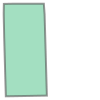

In [40]:
get_polygon(census.the_geom[0])

In [0]:
censusgeo['geometry'] = census.the_geom.apply(get_polygon)

In [0]:
censusgeo['Center'] = censusgeo.geometry.centroid

In [43]:
points.loc[points.dist_num == '1', 'geometry'].contains(censusgeo.geometry[0])

21    False
dtype: bool

In [0]:
def find_district(x, points):
  poss = [[int(d), p] for d, p in zip(points.dist_num, points.geometry) if d != '31']
  found = False
  i = 0
  while not found and i < len(poss):
    found = poss[i][1].contains(x)
    if found:
      return poss[i][0]
    found = poss[i][1].intersects(x)
    if found:
      return poss[i][0]
    i += 1
  return 0

In [0]:
censusgeo['District'] = censusgeo.Center.apply(lambda x: find_district(x, points))

In [46]:
censusgeo.head()

the_geom  STATEFP10  COUNTYFP10  \
0  MULTIPOLYGON (((-87.6290679994106 41.769086000...         17          31   
1  MULTIPOLYGON (((-87.6341179992764 41.774465999...         17          31   
2  MULTIPOLYGON (((-87.63485400018324 41.77263300...         17          31   
3  MULTIPOLYGON (((-87.73841099998789 41.85913100...         17          31   
4  MULTIPOLYGON (((-87.73217300001724 41.85476400...         17          31   

   TRACTCE10  BLOCKCE10       GEOID10      NAME10  TRACT_BLOC  Population  \
0     690300       2010  1.700000e+14  Block 2010  6903002010          62   
1     680900       3007  1.700000e+14  Block 3007  6809003007          15   
2     680900       3013  1.700000e+14  Block 3013  6809003013         104   
3     290900       4019  1.700000e+14  Block 4019  2909004019           3   
4     292500       4016  1.700000e+14  Block 4016  2925004016          84   

                                            geometry  \
0  POLYGON ((-87.62906799941059 41.76908600007152...   
1  POLYGON ((-87.6341179992764 41.77446599958471,...   
2  POLYGON ((-87.63485400018324 41.77263300022619...   
3  POLYGON ((-87.73841099998789 41.85913100037079...   
4  POLYGON ((-87.73217300001724 41.85476400046529...   

                                         Center  District  
0  POINT (-87.62943948484549 41.76817112181946)         7  
1  POINT (-87.63446840347193 41.77353312088748)         7  
2  POINT (-87.63590406991922 41.77305811812198)         7  
3  POINT (-87.73804333238493 41.85982510076681)        10  
4    POINT (-87.7311428020724 41.8558688289918)        10

In [0]:
censusgeo['Xmid'] = censusgeo.apply(getCoords, geom_col="Center", coord_type="x", axis=1)
censusgeo['Ymid'] = censusgeo.apply(getCoords, geom_col="Center", coord_type="y", axis=1)

In [0]:
add_c = pd.DataFrame(censusgeo).groupby(['District']).Population.sum()

In [0]:
to_add = pd.DataFrame({'District': add_c.index,
                      'Population': add_c})

In [50]:
to_add.head(1)

District  Population
District                      
0                0         157

In [0]:
updated_dist = test.merge(to_add, how='left', left_on='DIST_NUM', right_on='District')

In [52]:
updated_dist

dist_label                                                  x  \
0        17TH  [-87.71067089391354, -87.71066884721016, -87.7...   
1        20TH  [-87.66029423572358, -87.66029047841705, -87.6...   
2        31ST  [-87.82817787271652, -87.82816019864772, -87.8...   
3        31ST  [-87.83365455160555, -87.83365500481773, -87.8...   
4        19TH  [-87.64491798568677, -87.64430571367343, -87.6...   
5        25TH  [-87.71739917372257, -87.71739370504406, -87.7...   
6        14TH  [-87.69256666010364, -87.6925267026201, -87.69...   
7        31ST  [-87.69123096883077, -87.69122767195753, -87.6...   
8        22ND  [-87.63631615604635, -87.63592472853273, -87.6...   
9         5TH  [-87.58775992207175, -87.58761877917976, -87.5...   
10       24TH  [-87.6742430002891, -87.6654149168921, -87.665...   
11       16TH  [-87.80654723263612, -87.80655048971144, -87.8...   
12        8TH  [-87.71441587916783, -87.71432843559218, -87.7...   
13       18TH  [-87.63068325269062, -87.62959931256408, -87.6...   
14       12TH  [-87.65742450906868, -87.6573915419933, -87.65...   
15       11TH  [-87.70678940036518, -87.7067888089519, -87.70...   
16        7TH  [-87.6307594998131, -87.63075702975617, -87.63...   
17        3RD  [-87.58001294430272, -87.57949099191697, -87.5...   
18        4TH  [-87.55546554456848, -87.55475385893374, -87.5...   
19        6TH  [-87.59800071874317, -87.59777682166089, -87.5...   
20       10TH  [-87.68603841415118, -87.68603133082878, -87.6...   
21        1ST  [-87.62437192003144, -87.62418745810461, -87.6...   
22        9TH  [-87.63193411482827, -87.63116918264681, -87.6...   
23        2ND  [-87.60769369265259, -87.60617517270363, -87.6...   
24       15TH  [-87.74597835776501, -87.74597557961926, -87.7...   

                                                    y       Xmid       Ymid  \
0   [41.997365655369435, 41.99729359357709, 41.997... -87.724143  41.966390   
1   [41.990916338539776, 41.99079098951434, 41.990... -87.677595  41.979602   
2   [41.98384222028714, 41.98373456516249, 41.9836... -87.828618  41.979993   
3   [41.97535481526603, 41.97494340274407, 41.9749... -87.816795  41.963880   
4   [41.969727093814825, 41.96990659283057, 41.969... -87.664237  41.947777   
5   [41.93921621331353, 41.939092735775986, 41.938... -87.760009  41.921671   
6   [41.93942656894302, 41.93941369124984, 41.9393... -87.692326  41.918702   
7   [41.69898580247497, 41.69886126325922, 41.6986... -87.693599  41.695398   
8   [41.7361768878879, 41.73617884135765, 41.73618... -87.672382  41.704723   
9   [41.72230545260696, 41.72230734175367, 41.7223... -87.615929  41.683384   
10  [42.02300493835655, 42.0229268255811, 42.02292... -87.683123  42.004855   
11  [42.018964582740004, 42.01879571253115, 42.018... -87.835082  41.973998   
12  [41.82861397335225, 41.826739811303234, 41.826... -87.728001  41.778820   
13  [41.92622745644, 41.92652094598662, 41.9264921... -87.638525  41.907412   
14  [41.90350864630927, 41.90346576185894, 41.9033... -87.669456  41.878223   
15  [41.90283191507301, 41.902805415895806, 41.902... -87.720852  41.882638   
16  [41.79419617655521, 41.794102662334716, 41.794... -87.653432  41.775452   
17  [41.79348361789543, 41.793493088738714, 41.793... -87.595806  41.772138   
18  [41.76134756175376, 41.761689602873815, 41.761... -87.560734  41.701782   
19  [41.758652146348226, 41.758657323741375, 41.75... -87.634753  41.743453   
20  [41.86661254421863, 41.86639304543206, 41.8659... -87.710986  41.847289   
21  [41.888857310752584, 41.888822695788214, 41.88... -87.625336  41.864988   
22  [41.86014799195376, 41.86013454410361, 41.8601... -87.665038  41.819765   
23  [41.83858183903113, 41.83857102086602, 41.8385... -87.609539  41.808675   
24  [41.90235233193659, 41.902202856709806, 41.902... -87.760088  41.883926   

    DIST_NUM  District  Population  
0         17      17.0    144096.0  
1         20      20.0     91279.0  
2         31       NaN         NaN  
3         31       NaN         

In [0]:
from matplotlib import pyplot as plt

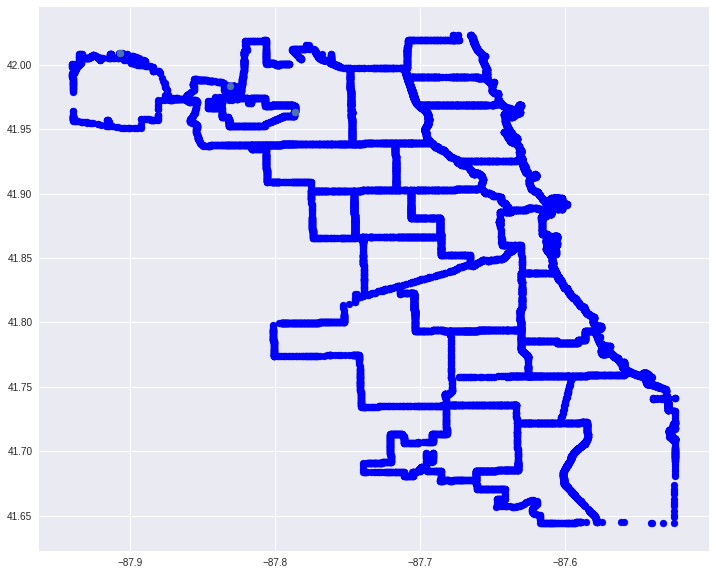

In [54]:
plt.figure(figsize=(12, 10))
for i in range(25):
  plt.scatter(test.x[i], test.y[i], c='blue')
plt.scatter(censusgeo.loc[censusgeo.District == 0, 'Xmid'], censusgeo.loc[censusgeo.District == 0, 'Ymid'])

In [0]:
# pickle.dump(updated_dist, open("ChicagoDistricts.pkl", 'wb'))

##### Add HotSpots, Bus Stations, and Metro Stations

In [0]:
# Bus Stations
bus = geopandas.read_file(r'CTA_BusStops.shp')
metro = geopandas.read_file(r'MetraStations.shp')


In [57]:
bus.geometry[0].geom_type

'Point'

In [58]:
bus['District'] = bus.geometry.apply(lambda x: find_district(x, points))
bus.head()

OBJECTID  SYSTEMSTOP       STREET               CROSS_ST DIR POS  \
0       193     11953.0  92ND STREET              BALTIMORE  EB  NS   
1       194      2723.0  79TH STREET  KILPATRICK (east leg)  EB  NS   
2       195      1307.0    FULLERTON             KILPATRICK  EB  NS   
3       196      6696.0       TAYLOR                 THROOP  EB  NS   
4       197        22.0      JACKSON                 KARLOV  EB  FS   

  ROUTESSTPG OWLROUTES     CITY  STATUS                PUBLIC_NAM    POINT_X  \
0         95      None  CHICAGO       1   92nd Street & Baltimore -87.548627   
1         79      None  CHICAGO       1  79th Street & Kilpatrick -87.737227   
2         74      None  CHICAGO       1    Fullerton & Kilpatrick -87.743974   
3        157      None  CHICAGO       1           Taylor & Throop -87.659294   
4        126      None  CHICAGO       1          Jackson & Karlov -87.727808   

     POINT_Y                                      geometry  District  
0  41.728184  POINT (-87.54862703700002 41.72818418100002)         4  
1  41.749111       POINT (-87.737227163 41.74911107100002)         8  
2  41.924143  POINT (-87.74397362600001 41.92414301600002)        25  
3  41.869314  POINT (-87.65929365400001 41.86931424800002)        12  
4  41.877007       POINT (-87.72780787099998 41.877006596)        11

In [72]:
bus.loc[bus.ROUTESSTPG.isna(), :]

OBJECTID  SYSTEMSTOP        STREET      CROSS_ST DIR POS ROUTESSTPG  \
1886      1824      7428.0   31ST STREET  CENTRAL PARK  WB  NS       None   
5101      5351      8405.0       WESTERN     FULLERTON  NB  NS       None   
5704      5644     14934.0  MCCORMICK PL       GATE 26  SB  MB       None   
6032      6284     12548.0       ADDISON    LAKE SHORE  EB  NS       None   
6658      6596     12553.0       ADDISON       FREMONT  WB  NS       None   

     OWLROUTES     CITY  STATUS                  PUBLIC_NAM    POINT_X  \
1886      None  CHICAGO       1  31st Street & Central Park -87.714467   
5101      None  CHICAGO       5         Western & Fullerton -87.687510   
5704      None  CHICAGO       2      McCormick Pl & Gate 26 -87.614301   
6032      None  CHICAGO       1        Addison & Lake Shore -87.643552   
6658      None  CHICAGO       1           Addison & Fremont -87.651796   

        POINT_Y                                      geometry  District  
1886  41.837129  POINT (-87.71446660100003 41.83712866600001)        10  
5101  41.924801  POINT (-87.68750979999999 41.92480125100002)        14  
5704  41.850494  POINT (-87.61430119900001 41.85049382699998)         1  
6032  41.948532  POINT (-87.64355207599999 41.94853216199999)        19  
6658  41.947350  POINT (-87.65179573299997 41.94734962299998)        19

In [64]:
metro['geometry'] = metro['geometry'].to_crs(epsg=4326)
metro['District'] = metro.geometry.apply(lambda x: find_district(x[0], points))
metro.head()
#metro.geometry[0][0].geom_type

OBJECTID  STATION_ID    ASSET_ID          NAME                  LONGNAME  \
0         1      1091.0  51201091.0  Stony Island              Stony Island   
1         2      1097.0  51201097.0     Bryn Mawr                 Bryn Mawr   
2         3      1103.0  51201103.0   South Shore               South Shore   
3         4      1109.0  51201109.0  Windsor Park              Windsor Park   
4         5      1115.0  51201115.0    Cheltenham  Cheltenham (79th Street)   

      LINES  BRANCH_ID  STATUS  MILEPOST FAREZONE    ...     \
0  Electric          1       1       9.1        B    ...      
1  Electric          1       1       9.7        B    ...      
2  Electric          1       1      10.3        B    ...      
3  Electric          1       1      10.9        B    ...      
4  Electric          1       1      11.5        B    ...      

                                     ADDRESS MUNICIPALI  TELEPHONE  WEBLINK  \
0            71st St. (at Stony Island Ave.)    Chicago       None     None   
1                71st St. (at Jeffrey Blvd.)    Chicago       None     None   
2  71st St. (near Yates and South Shore Dr.)    Chicago       None     None   
3                75th St. (at Exchange Ave.)    Chicago       None     None   
4                79th St. (at Exchange Ave.)    Chicago       None     None   

  LABELANGLE EDIT_INIT   EDIT_DATE YEAR_OPEN  \
0         30        ks  1995-08-02      None   
1         30        ks  1995-08-02      None   
2          0        ks  1995-08-02      None   
3          0        ks  1995-08-02      None   
4          0        ks  1995-08-02      None   

                                         geometry  District  
0  (POINT (-87.58685037384119 41.76601049942245))         3  
1  (POINT (-87.57699668171423 41.76611515611118))         3  
2  (POINT (-87.56571421669403 41.76524283540974))         3  
3    (POINT (-87.55962887298816 41.758508133942))         4  
4  (POINT (-87.55285171899953 41.75232053242235))         4  

[5 rows x 25 columns]

In [78]:
metro.iloc[0,:]

OBJECTID                                                       1
STATION_ID                                                  1091
ASSET_ID                                             5.12011e+07
NAME                                                Stony Island
LONGNAME                                            Stony Island
LINES                                                   Electric
BRANCH_ID                                                      1
STATUS                                                         1
MILEPOST                                                     9.1
FAREZONE                                                       B
ADA                                                            0
ADA2                                                           N
PKNRD                                                          0
BIKEPKNG                                                       0
TICKET_AVA                                                  None
ADDRESS                  

In [0]:
metro['Xmid'] = metro.geometry.apply(lambda x: getPointCoords(x[0], coord_type="x"))
metro['Ymid'] = metro.geometry.apply(lambda x: getPointCoords(x[0], coord_type="y"))

In [0]:
# Get how many routes stop at a single stop
bus['RoutesStopping'] = bus.ROUTESSTPG.apply(lambda x: len(x.split(',')) if x is not None else 0)
metro['RoutesStopping'] = metro.LINES.apply(lambda x: len(x.split(',')))

# Group by District
add_b = pd.DataFrame(bus).groupby(['District']).RoutesStopping.sum()
add_bc = pd.DataFrame(bus).groupby(['District']).RoutesStopping.count()
add_m = pd.DataFrame(metro).groupby(['District']).RoutesStopping.sum()
add_mc = pd.DataFrame(metro).groupby(['District']).RoutesStopping.count()

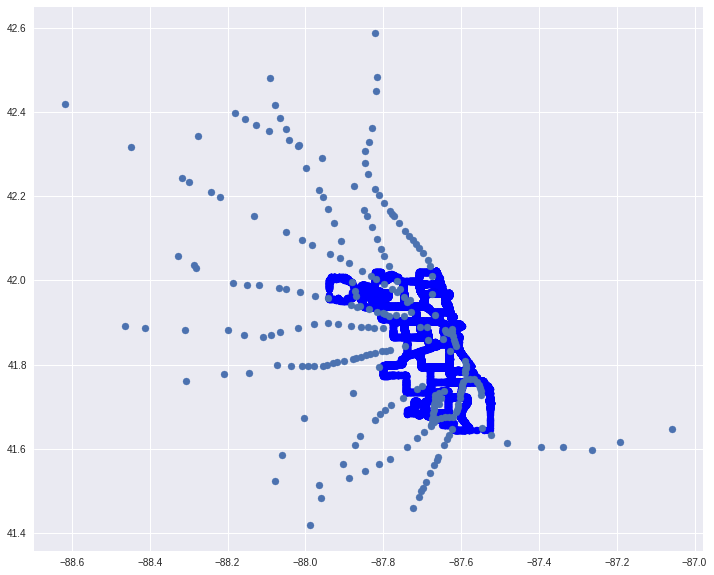

In [84]:
plt.figure(figsize=(12, 10))
for i in range(25):
  plt.scatter(test.x[i], test.y[i], c='blue')
plt.scatter(metro.Xmid, metro.Ymid)

In [0]:
from shapely.geometry import Point

In [95]:
hotspots = pickle.load(open(r'HotSpots.pkl', 'rb'))
hotspots_df = pd.DataFrame({'x': [r[0][1] for r in hotspots],
                            'y': [r[0][0] for r in hotspots],
                            'Crimes': [r[1] for r in hotspots]})
hotspots_df['geometry'] = [Point(x, y) for x, y in zip(hotspots_df.x, hotspots_df.y)]
hotspots_df['District'] = hotspots_df.geometry.apply(lambda x: find_district(x, points))
hotspots_df.head()


Crimes       x       y                geometry  District
0     806 -87.628  41.882  POINT (-87.628 41.882)         1
1     491 -87.628  41.884  POINT (-87.628 41.884)         1
2     412 -87.624  41.898  POINT (-87.624 41.898)        18
3     341 -87.905  41.976  POINT (-87.905 41.976)        16
4     284 -87.639  41.869  POINT (-87.639 41.869)         1

In [99]:
add_h = hotspots_df.groupby(['District']).Crimes.count()
add_h.head(2)

District
0     1
1    26
Name: Crimes, dtype: int64

In [104]:
# Combine Everything

final_add = pd.DataFrame({'District': add_h.index, 'HotSpots': add_h}).merge(pd.DataFrame({'District': add_mc.index, 'MetroSpots': add_mc}), how='outer', on='District')

final_add = final_add.merge(pd.DataFrame({'District': add_m.index, 'MetroLineStops': add_m}), how='outer', on='District')
final_add = final_add.merge(pd.DataFrame({'District': add_bc.index, 'BusStops': add_bc}), how='outer', on='District')
final_add = final_add.merge(pd.DataFrame({'District': add_b.index, 'BusLineStops': add_b}), how='outer', on='District')

final_add

District  HotSpots  MetroSpots  MetroLineStops  BusStops  BusLineStops
0          0       1.0       174.0           176.0       879          1118
1          1      26.0         9.0            20.0       322           962
2          2       3.0         5.0             6.0       504           678
3          3       5.0         5.0             6.0       423           637
4          4       1.0        10.0            10.0       583           843
5          5       3.0         9.0            10.0       332           556
6          6       9.0         1.0             1.0       395           504
7          7       1.0         NaN             NaN       372           405
8          8       1.0         2.0             2.0       807           993
9         10       3.0         NaN             NaN       391           420
10        11       6.0         1.0             1.0       376           386
11        12       1.0         3.0             5.0       616           713
12        14       2.0         1.0             2.0       381           407
13        15       1.0         NaN             NaN       236           241
14        16       3.0         6.0             6.0       701           759
15        18      26.0         NaN             NaN       366           631
16        19       4.0         1.0             1.0       558           773
17        24       2.0         1.0             1.0       289           367
18        25       1.0         6.0             6.0       595           624
19        17       NaN         3.0             3.0       433           479
20        22       NaN        10.0            10.0       414           532
21         9       NaN         NaN             NaN       666           804
22        20       NaN         NaN             NaN       269           354

In [106]:
pickle_read = updated_dist.merge(final_add, how='left', left_on='DIST_NUM', right_on='District').fillna(0)
pickle_read

dist_label                                                  x  \
0        17TH  [-87.71067089391354, -87.71066884721016, -87.7...   
1        20TH  [-87.66029423572358, -87.66029047841705, -87.6...   
2        31ST  [-87.82817787271652, -87.82816019864772, -87.8...   
3        31ST  [-87.83365455160555, -87.83365500481773, -87.8...   
4        19TH  [-87.64491798568677, -87.64430571367343, -87.6...   
5        25TH  [-87.71739917372257, -87.71739370504406, -87.7...   
6        14TH  [-87.69256666010364, -87.6925267026201, -87.69...   
7        31ST  [-87.69123096883077, -87.69122767195753, -87.6...   
8        22ND  [-87.63631615604635, -87.63592472853273, -87.6...   
9         5TH  [-87.58775992207175, -87.58761877917976, -87.5...   
10       24TH  [-87.6742430002891, -87.6654149168921, -87.665...   
11       16TH  [-87.80654723263612, -87.80655048971144, -87.8...   
12        8TH  [-87.71441587916783, -87.71432843559218, -87.7...   
13       18TH  [-87.63068325269062, -87.62959931256408, -87.6...   
14       12TH  [-87.65742450906868, -87.6573915419933, -87.65...   
15       11TH  [-87.70678940036518, -87.7067888089519, -87.70...   
16        7TH  [-87.6307594998131, -87.63075702975617, -87.63...   
17        3RD  [-87.58001294430272, -87.57949099191697, -87.5...   
18        4TH  [-87.55546554456848, -87.55475385893374, -87.5...   
19        6TH  [-87.59800071874317, -87.59777682166089, -87.5...   
20       10TH  [-87.68603841415118, -87.68603133082878, -87.6...   
21        1ST  [-87.62437192003144, -87.62418745810461, -87.6...   
22        9TH  [-87.63193411482827, -87.63116918264681, -87.6...   
23        2ND  [-87.60769369265259, -87.60617517270363, -87.6...   
24       15TH  [-87.74597835776501, -87.74597557961926, -87.7...   

                                                    y       Xmid       Ymid  \
0   [41.997365655369435, 41.99729359357709, 41.997... -87.724143  41.966390   
1   [41.990916338539776, 41.99079098951434, 41.990... -87.677595  41.979602   
2   [41.98384222028714, 41.98373456516249, 41.9836... -87.828618  41.979993   
3   [41.97535481526603, 41.97494340274407, 41.9749... -87.816795  41.963880   
4   [41.969727093814825, 41.96990659283057, 41.969... -87.664237  41.947777   
5   [41.93921621331353, 41.939092735775986, 41.938... -87.760009  41.921671   
6   [41.93942656894302, 41.93941369124984, 41.9393... -87.692326  41.918702   
7   [41.69898580247497, 41.69886126325922, 41.6986... -87.693599  41.695398   
8   [41.7361768878879, 41.73617884135765, 41.73618... -87.672382  41.704723   
9   [41.72230545260696, 41.72230734175367, 41.7223... -87.615929  41.683384   
10  [42.02300493835655, 42.0229268255811, 42.02292... -87.683123  42.004855   
11  [42.018964582740004, 42.01879571253115, 42.018... -87.835082  41.973998   
12  [41.82861397335225, 41.826739811303234, 41.826... -87.728001  41.778820   
13  [41.92622745644, 41.92652094598662, 41.9264921... -87.638525  41.907412   
14  [41.90350864630927, 41.90346576185894, 41.9033... -87.669456  41.878223   
15  [41.90283191507301, 41.902805415895806, 41.902... -87.720852  41.882638   
16  [41.79419617655521, 41.794102662334716, 41.794... -87.653432  41.775452   
17  [41.79348361789543, 41.793493088738714, 41.793... -87.595806  41.772138   
18  [41.76134756175376, 41.761689602873815, 41.761... -87.560734  41.701782   
19  [41.758652146348226, 41.758657323741375, 41.75... -87.634753  41.743453   
20  [41.86661254421863, 41.86639304543206, 41.8659... -87.710986  41.847289   
21  [41.888857310752584, 41.888822695788214, 41.88... -87.625336  41.864988   
22  [41.86014799195376, 41.86013454410361, 41.8601... -87.665038  41.819765   
23  [41.83858183903113, 41.83857102086602, 41.8385... -87.609539  41.808675   
24  [41.90235233193659, 41.902202856709806, 41.902... -87.760088  41.883926   

    DIST_NUM  District_x  Population  District_y  HotSpots  MetroSpots  \
0         17        17.0    144096.0        17.0       0.0         3.0   
1         20        20.0     91

In [0]:
pickle.dump(pickle_read, open("ChicagoDistricts.pkl", 'wb'))

In [0]:
#censusgeo['Dist10'] = censusgeo.geometry.apply(lambda x: points.loc[points.dist_num == '10', 'geometry'].contains(x))

### Check out other shapefiles

In [0]:
# Metro Stations
metro = geopandas.read_file(r'MetraStations.shp')
metro.crs

{'datum': 'NAD83',
 'k': 0.999975,
 'lat_0': 36.66666666666666,
 'lon_0': -88.33333333333333,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [0]:
metro.LINES.unique()

array(['Electric', 'S. Shore', 'Electric, S. Shore', 'Rock Is.',
       'Milw-N, Milw-W, NCS, BNSF, Heritage, SWS', 'SWS', 'Heritage',
       'BNSF', 'UP-W', 'Milw-N, Milw-W, NCS', 'Milw-W', 'UP-NW',
       'Milw-W, NCS', 'UP-N, UP-NW, UP-W', 'UP-N, UP-NW', 'Milw-N', 'NCS',
       'UP-N', 'Rock Is., Heritage'], dtype=object)

In [0]:
metro['str_geometry'] = metro.geometry.apply(lambda x: str(x))

In [0]:
metro.str_geometry[0]

'MULTIPOINT (-87.58685037384119 41.76601049942245)'

In [0]:
import re

In [0]:
pattern = r'MULTIPOINT \((-?[\d.]+) ([\d.]+)\)'

In [0]:
re.search(pattern, 'MULTIPOINT (-87.58685037384119 41.76601049942245)').group(1)

'-87.58685037384119'

In [0]:
metro['x'] = metro.str_geometry.apply(lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) is not None else None)
metro['y'] = metro.str_geometry.apply(lambda x: re.search(pattern, x).group(2) if re.search(pattern, x) is not None else None)

In [0]:
# 54, 74, 156
metro.iloc[54,24]

'MULTIPOINT (-87.67784666263132 41.65485873517713, -87.67749521799104 41.65470447371769)'

In [0]:
metro.columns

Index(['OBJECTID', 'STATION_ID', 'ASSET_ID', 'NAME', 'LONGNAME', 'LINES',
       'BRANCH_ID', 'STATUS', 'MILEPOST', 'FAREZONE', 'ADA', 'ADA2', 'PKNRD',
       'BIKEPKNG', 'TICKET_AVA', 'ADDRESS', 'MUNICIPALI', 'TELEPHONE',
       'WEBLINK', 'LABELANGLE', 'EDIT_INIT', 'EDIT_DATE', 'YEAR_OPEN',
       'geometry', 'str_geometry', 'x', 'y'],
      dtype='object')

In [0]:
metro_export = metro.loc[:,['STATION_ID', 'LINES', 'x', 'y']].copy()

In [0]:
pickle.dump(pd.DataFrame(metro_export.dropna()), open("ChicagoMetro.pkl", 'wb'))

### CTA Points

In [0]:
# CTA Stations
bus = geopandas.read_file(r'CTA_BusStops.shp')
bus.crs

{}

In [0]:
bus.ROUTESSTPG.unique()

array(['95', '79', '74', '157', '126', '92', '9,X9', '22', '22,36', '84',
       '11', '93', '8A,108', '44', '34,119', '54', '62,62H', '36', '68',
       '54B', '3', '81', 'N5,6,26,71', '24', '80', 'N5,6,15,67', '47',
       '7', '20', '81W,91', '67', '12', '81W', '43', '87', '34', '73',
       '201', '152', '77', '66', '15', '21', '35', '65', '34,108', '78',
       '59', '8', '53', '8,8A', '201,206', '72', '112', 'N4,59', '103',
       '34,106', '31', '24,87', '134,135,136', '52', '56', '8A', '29',
       '94', '128,192', '55', '90', '91', '9', '44,75', '63', '119',
       '22,24,36,62,151', '111', '71', '155', '82', '4', '156', '37',
       '6,15,28', '48', '165', '28', '97', '76', '115', '96', '125',
       '26,100', '39', '8,44', '18', 'N5,95', '80,135,148', '12,18,N62',
       '47,48', '70', 'N5,30,67', '30', '50', '86', '49', '48,95',
       '10,125', '169', '47,94', '57', '62H,63W', '36,151,155', '75',
       '63W', '6,28', '93,206', '62', '54A', '52,52A', 'N5,95,100',
       '2

In [0]:
bus.head()

OBJECTID  SYSTEMSTOP       STREET               CROSS_ST DIR POS  \
0       193     11953.0  92ND STREET              BALTIMORE  EB  NS   
1       194      2723.0  79TH STREET  KILPATRICK (east leg)  EB  NS   
2       195      1307.0    FULLERTON             KILPATRICK  EB  NS   
3       196      6696.0       TAYLOR                 THROOP  EB  NS   
4       197        22.0      JACKSON                 KARLOV  EB  FS   

  ROUTESSTPG OWLROUTES     CITY  STATUS                PUBLIC_NAM    POINT_X  \
0         95      None  CHICAGO       1   92nd Street & Baltimore -87.548627   
1         79      None  CHICAGO       1  79th Street & Kilpatrick -87.737227   
2         74      None  CHICAGO       1    Fullerton & Kilpatrick -87.743974   
3        157      None  CHICAGO       1           Taylor & Throop -87.659294   
4        126      None  CHICAGO       1          Jackson & Karlov -87.727808   

     POINT_Y                                      geometry  
0  41.728184  POINT (-87.54862703700002 41.72818418100002)  
1  41.749111       POINT (-87.737227163 41.74911107100002)  
2  41.924143  POINT (-87.74397362600001 41.92414301600002)  
3  41.869314  POINT (-87.65929365400001 41.86931424800002)  
4  41.877007       POINT (-87.72780787099998 41.877006596)

In [0]:
bus_export = bus.loc[:,['OBJECTID', 'ROUTESSTPG', 'POINT_X', 'POINT_Y']].copy()

In [0]:
pickle.dump(pd.DataFrame(bus_export), open("ChicagoBus.pkl", 'wb'))